In [1]:
import nilearn.plotting as nip
import nilearn.image as nii
import matplotlib.pyplot as plt

/home/hakesh/anaconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
voiscolors = ["purple", "orange", "red", "green", "aqua"]
vois = ["Action", "LTM", "Perception", "Procedural", "WM"]
taskcolors = ["blue", "orange", "red", "purple", "green", "magenta"]
tasks = ["Emotion", "Gambling", "Language", "Relational", "Social", "WM"]

## Independent Visualization

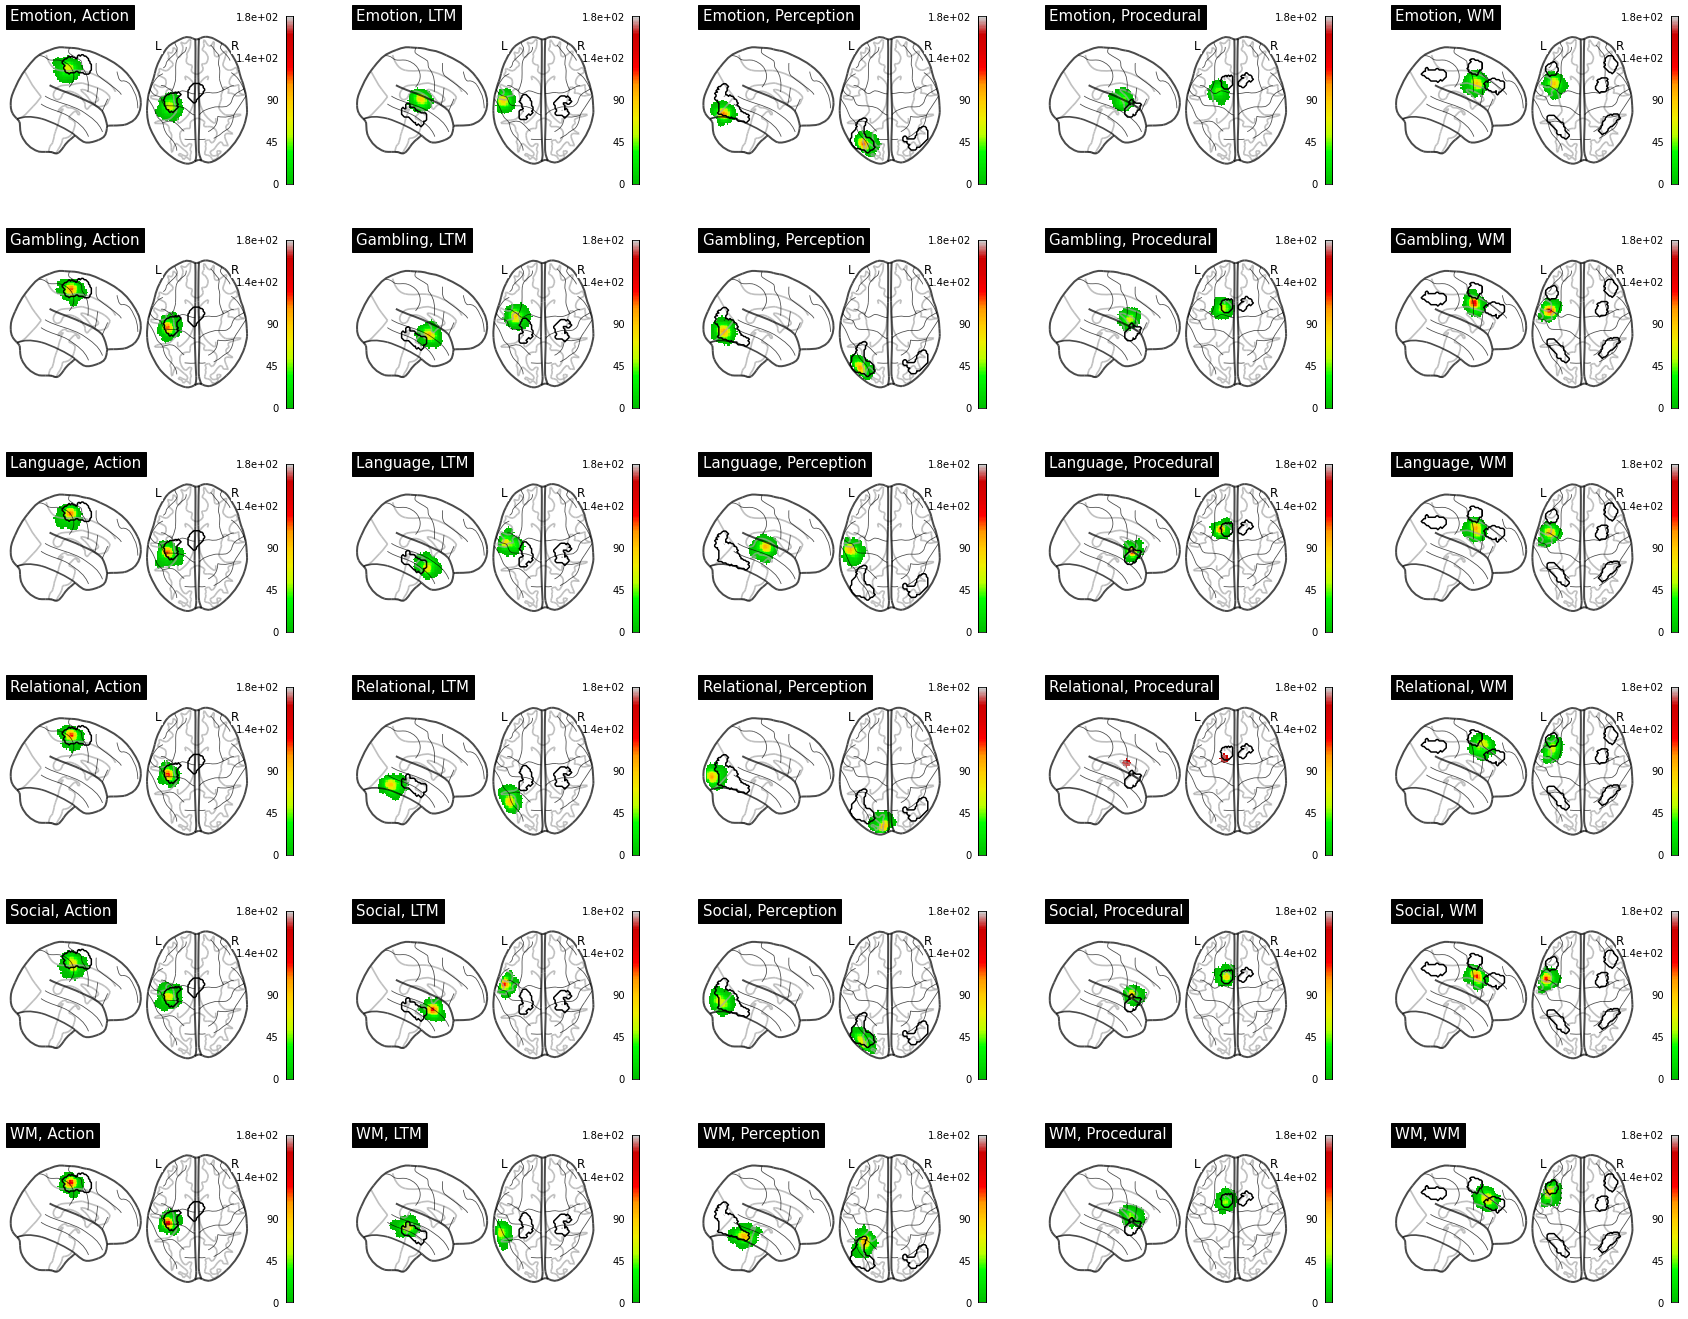

In [11]:
fig, axs = plt.subplots(len(tasks), len(vois), figsize=(30, 24))
it = 0
iv = 0
for iv, voi in enumerate(vois): 
    it = 0
    for task, tcolor in zip(tasks, taskcolors):
        #print("%s, %s" % (task, voi))
        d = nip.plot_glass_brain("%s/VOI_%s_mask_sum.nii" % (task, voi), display_mode='xz', plot_abs=False,
                                 title = "%s, %s" % (task, voi), axes=axs[it,iv], colorbar=True, cmap="nipy_spectral", vmax=180)
        rsname = voi.lower()
        d.add_contours("../../rsfMRI/rois/%s_optimized.nii" % (rsname,), levels=[0.001], colors="black")
        it = it + 1
plt.savefig("overlaps_across_tasks_and_vois.png")
plt.show()

## Overlap

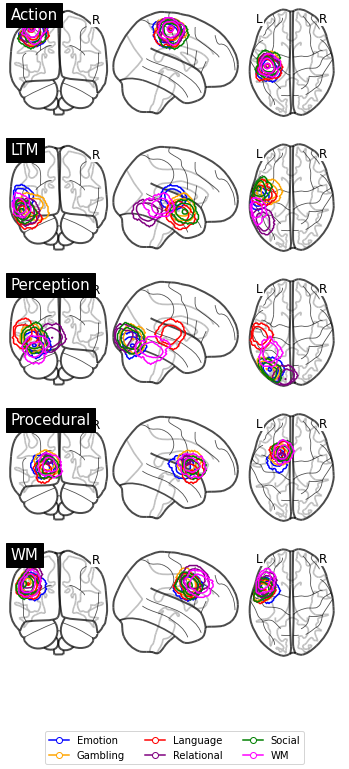

In [12]:
from matplotlib.lines import Line2D
fig, axs = plt.subplots(len(vois), 1, figsize=(6, 12))
v_i = 0
for voi, vcolor in zip(vois, voiscolors): 
    d=nip.plot_glass_brain(None, title=voi, axes=axs[v_i])
    for task, tcolor in zip(tasks, taskcolors):
        d.add_contours("%s/VOI_%s_mask_sum.nii" % (task, voi), 
                       levels=[0, 10, 100], colors=tcolor)
    v_i = v_i + 1
    #plt.savefig("overlap_across_tasks_%s.png" % (voi,), figsize=(7,3))
    #nip.show()

handles = [Line2D([0], [0], marker='o', markerfacecolor='w', color=x, markersize=6) for x in taskcolors]

fig.legend(handles, tasks, loc="lower center", ncol=3)
plt.savefig("overlap_across_tasks.png")
plt.show()